In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
html = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250').content
soup = BeautifulSoup(html, 'html.parser')

In [4]:
rows = soup.tbody.find_all('tr')

In [5]:
for row in rows:
    column = row.find('td', 'titleColumn')
    title = column.a.text
    year = column.span.text

for row in rows:
  
  column2 = row.find('td', 'ratingColumn')
  rating = column2.strong.text
  

In [57]:
yearWISErating={}
titles=[]
for row in rows:
    column = row.find('td', 'titleColumn')
    title = column.a.text
    year = column.span.text
    link = column.a['href']
    column2 = row.find('td', 'ratingColumn')
    rating = column2.strong.text
    
    movie_page = requests.get(f'https://www.imdb.com/chart/top/?ref_=nv_mv_250').content
    movie_soup = BeautifulSoup(movie_page, 'html.parser')
    print(f'{title} {year} {rating}')
    titles.append(title)
    if year in yearWISErating:
      value= float(yearWISErating[year])
      yearWISErating[year] = (value + float(rating))/2
    else:
      yearWISErating[year]= rating
print(yearWISErating)

The Shawshank Redemption (1994) 9.2
The Godfather (1972) 9.2
The Dark Knight (2008) 9.0
The Godfather Part II (1974) 9.0
12 Angry Men (1957) 9.0
Schindler's List (1993) 8.9
The Lord of the Rings: The Return of the King (2003) 8.9
Pulp Fiction (1994) 8.8
The Lord of the Rings: The Fellowship of the Ring (2001) 8.8
The Good, the Bad and the Ugly (1966) 8.8
Forrest Gump (1994) 8.8
Fight Club (1999) 8.7
The Lord of the Rings: The Two Towers (2002) 8.7
Inception (2010) 8.7
Star Wars: Episode V - The Empire Strikes Back (1980) 8.7
The Matrix (1999) 8.7
Goodfellas (1990) 8.7
One Flew Over the Cuckoo's Nest (1975) 8.6
Se7en (1995) 8.6
Seven Samurai (1954) 8.6
It's a Wonderful Life (1946) 8.6
The Silence of the Lambs (1991) 8.6
City of God (2002) 8.6
Saving Private Ryan (1998) 8.6
Life Is Beautiful (1997) 8.6
Interstellar (2014) 8.6
The Green Mile (1999) 8.6
Star Wars (1977) 8.6
Terminator 2: Judgment Day (1991) 8.5
Back to the Future (1985) 8.5
Spirited Away (2001) 8.5
Psycho (1960) 8.5
The Pi

In [58]:
print(titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'Se7en', 'Seven Samurai', "It's a Wonderful Life", 'The Silence of the Lambs', 'City of God', 'Saving Private Ryan', 'Life Is Beautiful', 'Interstellar', 'The Green Mile', 'Star Wars', 'Terminator 2: Judgment Day', 'Back to the Future', 'Spirited Away', 'Psycho', 'The Pianist', 'Parasite', 'Léon: The Professional', 'The Lion King', 'Gladiator', 'American History X', 'The Departed', 'The Usual Suspects', 'The Prestige', 'Whiplash', 'Casablanca', 'Harakiri', 'Grave of the Fireflies', 'The Intouchables', 'Modern Times', 'O

In [7]:
print(yearWISErating)

{'(1994)': 8.6, '(1972)': '9.2', '(2008)': 8.399999999999999, '(1974)': 8.55, '(1957)': 8.15625, '(1993)': 8.15, '(2003)': 8.08125, '(2001)': 8.20625, '(1966)': 8.2, '(1999)': 8.16875, '(2002)': 8.337499999999999, '(2010)': 8.1625, '(1980)': 8.212499999999999, '(1990)': '8.7', '(1975)': 8.08125, '(1995)': 8.08515625, '(1954)': 8.2, '(1946)': 8.3, '(1991)': 8.55, '(1998)': 8.16875, '(1997)': 8.19375, '(2014)': 8.15625, '(1977)': '8.6', '(1985)': 8.3, '(1960)': 8.35, '(2019)': 8.09375, '(2000)': 8.14375, '(2006)': 8.325, '(1942)': 8.25, '(1962)': 8.3, '(1988)': 8.212499999999999, '(2011)': 8.08125, '(1936)': '8.4', '(1968)': 8.350000000000001, '(1979)': 8.2, '(1931)': 8.350000000000001, '(1981)': 8.350000000000001, '(2012)': 8.325000000000001, '(1950)': 8.2, '(1940)': 8.1, '(2018)': 8.2625, '(1986)': 8.075, '(1964)': '8.3', '(1984)': 8.15, '(2009)': 8.06875, '(2017)': 8.1, '(2016)': 8.0875, '(2022)': 8.15, '(1952)': 8.25, '(1963)': 8.2, '(1983)': 8.25, '(2004)': 8.0296875, '(1992)': 8.12

In [33]:
import pandas as pd
df_new = pd.DataFrame(list(yearWISErating.items()),columns = ['year','ratings']) 

In [34]:
df_new

,year,ratings
0,(1994),8.6
1,(1972),9.2
2,(2008),8.4
3,(1974),8.55
4,(1957),8.15625
...,...,...
81,(1924),8.1
82,(1928),8.1
83,(1955),8.0
84,(1967),8.0


In [14]:
my_list1 = list(yearWISErating.keys())
print(my_list1)

['(1994)', '(1972)', '(2008)', '(1974)', '(1957)', '(1993)', '(2003)', '(2001)', '(1966)', '(1999)', '(2002)', '(2010)', '(1980)', '(1990)', '(1975)', '(1995)', '(1954)', '(1946)', '(1991)', '(1998)', '(1997)', '(2014)', '(1977)', '(1985)', '(1960)', '(2019)', '(2000)', '(2006)', '(1942)', '(1962)', '(1988)', '(2011)', '(1936)', '(1968)', '(1979)', '(1931)', '(1981)', '(2012)', '(1950)', '(1940)', '(2018)', '(1986)', '(1964)', '(1984)', '(2009)', '(2017)', '(2016)', '(2022)', '(1952)', '(1963)', '(1983)', '(2004)', '(1992)', '(1941)', '(1959)', '(1958)', '(1971)', '(1944)', '(1987)', '(2020)', '(1973)', '(1976)', '(1927)', '(1948)', '(1989)', '(2007)', '(1965)', '(2005)', '(1921)', '(2013)', '(1961)', '(2021)', '(1982)', '(1939)', '(2015)', '(1996)', '(1925)', '(1949)', '(1926)', '(1978)', '(1953)', '(1924)', '(1928)', '(1955)', '(1967)', '(1934)']


In [64]:
yearsList=[]
for element in my_list1:
  temp=element[1:5]
  yearsList.append(int(temp))
  #print(int(temp))
  #print(type(temp))

print(yearsList)

[1994, 1972, 2008, 1974, 1957, 1993, 2003, 2001, 1966, 1999, 2002, 2010, 1980, 1990, 1975, 1995, 1954, 1946, 1991, 1998, 1997, 2014, 1977, 1985, 1960, 2019, 2000, 2006, 1942, 1962, 1988, 2011, 1936, 1968, 1979, 1931, 1981, 2012, 1950, 1940, 2018, 1986, 1964, 1984, 2009, 2017, 2016, 2022, 1952, 1963, 1983, 2004, 1992, 1941, 1959, 1958, 1971, 1944, 1987, 2020, 1973, 1976, 1927, 1948, 1989, 2007, 1965, 2005, 1921, 2013, 1961, 2021, 1982, 1939, 2015, 1996, 1925, 1949, 1926, 1978, 1953, 1924, 1928, 1955, 1967, 1934]


In [65]:
print(yearsList)
print(titles)

[1994, 1972, 2008, 1974, 1957, 1993, 2003, 2001, 1966, 1999, 2002, 2010, 1980, 1990, 1975, 1995, 1954, 1946, 1991, 1998, 1997, 2014, 1977, 1985, 1960, 2019, 2000, 2006, 1942, 1962, 1988, 2011, 1936, 1968, 1979, 1931, 1981, 2012, 1950, 1940, 2018, 1986, 1964, 1984, 2009, 2017, 2016, 2022, 1952, 1963, 1983, 2004, 1992, 1941, 1959, 1958, 1971, 1944, 1987, 2020, 1973, 1976, 1927, 1948, 1989, 2007, 1965, 2005, 1921, 2013, 1961, 2021, 1982, 1939, 2015, 1996, 1925, 1949, 1926, 1978, 1953, 1924, 1928, 1955, 1967, 1934]
['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'Se7en',

In [69]:
import pandas as pd
df = pd.DataFrame (yearsList, columns = ['year'])
df

,year
0,1994
1,1972
2,2008
3,1974
4,1957
...,...
81,1924
82,1928
83,1955
84,1967


In [71]:
import pandas as pd
df1 = pd.DataFrame (my_list, columns = ['ratings'])
df1

,ratings
0,8.6
1,9.2
2,8.4
3,8.55
4,8.15625
...,...
81,8.1
82,8.1
83,8.0
84,8.0


In [10]:
my_list = list(yearWISErating.values())
print(my_list)

[8.6, '9.2', 8.399999999999999, 8.55, 8.15625, 8.15, 8.08125, 8.20625, 8.2, 8.16875, 8.337499999999999, 8.1625, 8.212499999999999, '8.7', 8.08125, 8.08515625, 8.2, 8.3, 8.55, 8.16875, 8.19375, 8.15625, '8.6', 8.3, 8.35, 8.09375, 8.14375, 8.325, 8.25, 8.3, 8.212499999999999, 8.08125, '8.4', 8.350000000000001, 8.2, 8.350000000000001, 8.350000000000001, 8.325000000000001, 8.2, 8.1, 8.2625, 8.075, '8.3', 8.15, 8.06875, 8.1, 8.0875, 8.15, 8.25, 8.2, 8.25, 8.0296875, 8.125, '8.3', 8.075, '8.2', '8.2', '8.2', '8.2', 8.2, 8.1, 8.05, '8.2', 8.149999999999999, 8.149999999999999, 8.0375, 8.1, 8.075, '8.2', 8.0625, 8.149999999999999, 8.05, 8.05, 8.05, 8.05, 8.1, '8.1', '8.1', '8.1', '8.1', 8.1, '8.1', '8.1', '8.0', '8.0', '8.0']


In [17]:
import pandas as pd

df = pd.DataFrame (my_list, columns = ['ratings'])
print (df)

    ratings
0       8.6
1       9.2
2       8.4
3      8.55
4   8.15625
..      ...
81      8.1
82      8.1
83      8.0
84      8.0
85      8.0

[86 rows x 1 columns]


In [16]:
import pandas as pd

df2 = pd.DataFrame (my_list1, columns = ['year'])
print (df2)

      year
0   (1994)
1   (1972)
2   (2008)
3   (1974)
4   (1957)
..     ...
81  (1924)
82  (1928)
83  (1955)
84  (1967)
85  (1934)

[86 rows x 1 columns]


In [92]:
import re
import time
import sqlite3
conn = sqlite3.connect('IMDb.db')
c = conn.cursor()
c.execute("CREATE TABLE IMDb(\
              Name varchar(100), \
              ratings floatvarchar(100), \
              year varchar(100))")


In [19]:
result["year"].fillna("0", inplace = True)

In [20]:
result["ratings"].fillna("0", inplace = True)

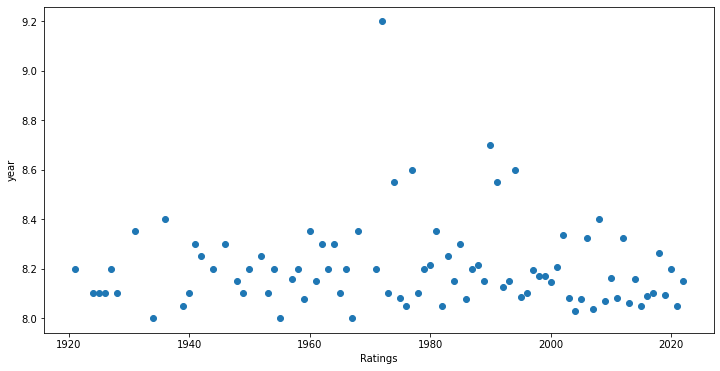

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=df['year']
y=df1['ratings']
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_xlabel("Ratings")
ax.set_ylabel("year")
ax.scatter(x,y)

In [39]:
df_new.dtypes

year       object
ratings    object
dtype: object

LinearRegression()

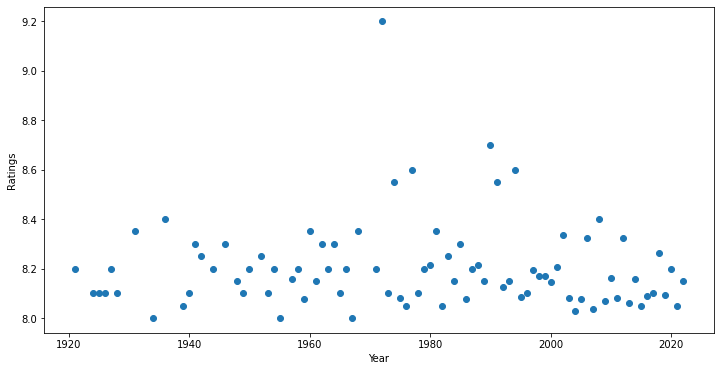

In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x=df[['year']].to_numpy()
y=df1[['ratings']].to_numpy()
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_xlabel("Year")
ax.set_ylabel("Ratings")
ax.scatter(x,y)
model= LinearRegression()
model.fit(x,y)

In [81]:
model.intercept_
model.coef_

array([[-0.00015882]])

In [82]:
model.score(x,y)

0.000634975785631986

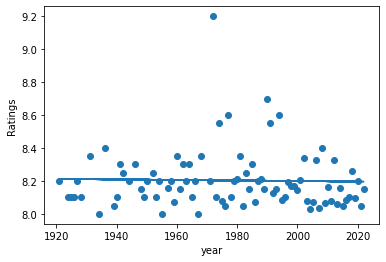

In [83]:
y_est = model.predict(x)
ax=plt.axes()
ax.set_xlabel("year")
ax.set_ylabel("Ratings")
ax.scatter(x,y)
ax.plot(x,y_est)

In [85]:
x_new =np.asarray(6)
y_pred=model.predict(x_new.reshape(1,-1))
print("Ratings:",y_pred)
y_pred

Ratings: [[8.51642872]]


array([[8.51642872]])

In [101]:
query = "INSERT INTO IMDb VALUES (?, ?, ?)"
#c.execute(query, (titles,my_list, yearsList))
c.execute('''INSERT INTO IMDb VALUES (?,?,?);''', (str(my_list[0]),str(my_list[0]),str(yearsList[0])))

In [104]:
with open("IMDB.txt", "w") as output:
    output.write(str(titles))